In [1]:
import numpy as np
#import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, ZeroPadding2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
x_train = np.load('x_train.npy')
x_test = np.load('x_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [3]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [4]:
np.shape(x_train)

(60000, 28, 28)

In [5]:
x_train = x_train / 255
x_test = x_test / 255

In [6]:
x_train[1000]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
x_train = np.expand_dims(x_train, axis=3)

In [8]:
np.shape(x_train)

(60000, 28, 28, 1)

In [9]:
x_train[1000]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [10]:
x_test = np.expand_dims(x_test, axis=3)

In [15]:
model = Sequential([
    ZeroPadding2D(padding=(1, 1), input_shape=(28, 28, 1)),
    Conv2D(32, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    ZeroPadding2D(padding=(1, 1)),
    Conv2D(64, 3, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax'),
])

In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_4 (ZeroPaddin (None, 30, 30, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
zero_padding2d_5 (ZeroPaddin (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)             

In [18]:
model.compile('adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
y_train_ohe = to_categorical(y_train)
y_test_ohe = to_categorical(y_test)

In [20]:
y_train_ohe[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
history = model.fit(x_train, y_train_ohe, epochs=10, validation_data=(x_test, y_test_ohe), batch_size=300)

Epoch 1/10
200/200 [==============================] - 32s 158ms/step - loss: 0.2986 - accuracy: 0.9145 - val_loss: 0.0746 - val_accuracy: 0.9760
Epoch 2/10
200/200 [==============================] - 33s 165ms/step - loss: 0.0669 - accuracy: 0.9798 - val_loss: 0.0475 - val_accuracy: 0.9851
Epoch 3/10
200/200 [==============================] - 29s 145ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0353 - val_accuracy: 0.9882
Epoch 4/10
200/200 [==============================] - 29s 144ms/step - loss: 0.0346 - accuracy: 0.9896 - val_loss: 0.0296 - val_accuracy: 0.9895
Epoch 5/10
200/200 [==============================] - 29s 143ms/step - loss: 0.0268 - accuracy: 0.9918 - val_loss: 0.0274 - val_accuracy: 0.9909
Epoch 6/10
200/200 [==============================] - 29s 144ms/step - loss: 0.0233 - accuracy: 0.9926 - val_loss: 0.0264 - val_accuracy: 0.9911
Epoch 7/10
200/200 [==============================] - 29s 144ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.0320 - val_ac

In [22]:
import matplotlib.pyplot as plt

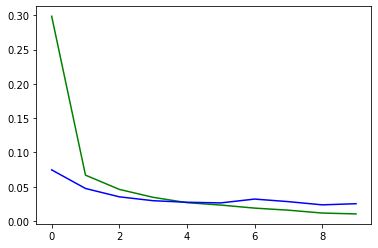

In [23]:
plt.plot(history.history['loss'], color='green', label='Train Data')
plt.plot(history.history['val_loss'], color='blue', label='Validation Data')

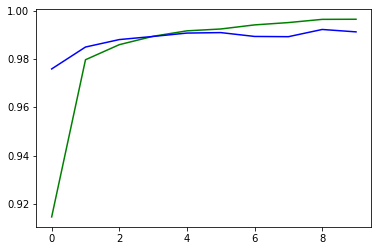

In [24]:
plt.plot(history.history['accuracy'], color='green', label='Train Data')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation Data')